<b>||  INNOMATICS RESEARCH LABS  ||</b>

<b> ||  Hypothesis Testing  || </b>

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy  as np
from scipy.stats import t

In [2]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?</b>

Step 1:
Alternate Hypothesis (Bold claim): $$H_1 : \mu\neq 500$$

Null Hypothesis (Status Quo):$$H_0 : \mu=500$$

Step 2:
 
Collect a sample of size n = 10 $$ [ 490,220,470,500,495,496,496,498,508,480 ] $$


Compute sample mean $$ \bar x=465.3 $$

Step 3:
Compute Test Statistic: $$ t=\frac{\bar{x}-\mu}{ s/\sqrt[2]{n}}$$

Step 4:
Decide $$ α = 0.05 $$

Step 5.1:
Two tailed t-test:$$ Reject H_0 if |t|$$

In [4]:
lst = [490,220,470,500,495,496,496,498,508,480]

sum(lst)/len(lst)

465.3

In [5]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [6]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84

In [7]:
#Calculating the sample standard deviation

total_sum=0
for i in lst:
    value=(i-sample_mean)**2
    total_sum+=value
n=20
sample_std=(total_sum/(n-1))**0.5
sample_std

59.77329979531874

In [8]:
t1 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t1)

-1.8357868008557983


Text(465.3, 0.0007, 'x_bar')

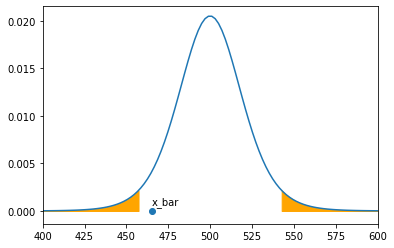

In [9]:

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x, df=sample_size-1,loc=mean,scale=std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df=sample_size-1,loc=mean,scale=std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df=sample_size-1,loc=mean,scale=std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [10]:
if(np.abs(t1) > t_critical):   
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [11]:
import scipy.stats

In [12]:
p_value = scipy.stats.t.sf(abs(-1.26),df=9)

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.11967961957914258
Fail to reject Null Hypothesis
